# Project: Investigate Movie Genre Popularity

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will be investigating movie genre popularity from dataset between year 1960 and 2015. We will analyse whether genre popularity has correlation with vote score, revenue and budget. Finally we will have a further look if we can identify the production company with highest revenue from the analysis.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First, we view some sample data to get general idea how the data looks like.

In [21]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Then we also view how many records available in the dataset and the data type for each record. Here we can see that the dataset contains 10866 rows and 21 columns. We can also spot missing data under certain columns.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Next, we look at the data distribution. Here we can easily see the mean, min and max values of some data. One important takeaway from this information is that this dataset contains movie data from year 1960 to 2015.

In [23]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Unused columns

Since not all columns will be used in the analysis, we will be removing some of the columns which are not relevant.

In [24]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


#### Columns Reorganization

We can also reorganize the column order so that the title comes first, followed by cast, director, and so on. This way it will be easier to look at the data.

In [25]:
df = df.iloc[:, [3, 4, 5, 6, 7, 1, 2, 0, 8, 9, 10]]
df.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,28.419936,6185,7.1,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,110000000,295238201,13.112507,2480,6.3,2015
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,11.173104,5292,7.5,2015
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,190000000,1506249360,9.335014,2947,7.3,2015


#### Missing Data

Now we can see that we are down to 11 columns and there are missing data under Cast, Director, Genres, and Production Companies.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   cast                  10790 non-null  object 
 2   director              10822 non-null  object 
 3   genres                10843 non-null  object 
 4   production_companies  9836 non-null   object 
 5   budget                10866 non-null  int64  
 6   revenue               10866 non-null  int64  
 7   popularity            10866 non-null  float64
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 933.9+ KB


#### Data Distribution

We can also see the data distribution from histogram below. We can see that most movies are getting around 5-6 vote average and most movies are being produced after year 2000.

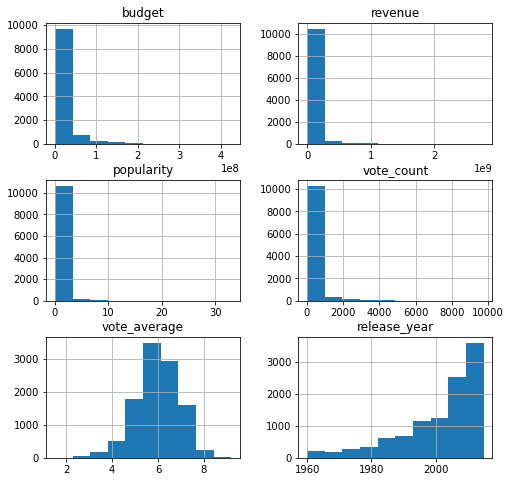

In [27]:
df.hist(figsize=(8,8));

#### Duplicated Data

Lastly, we check if there is any duplicated record and it seems that there is one. 

In [28]:
df[df.duplicated()]

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
2090,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,30000000,967000,0.59643,110,5.0,2010


### Data Cleaning

From the previous step, we know that there are missing data under Cast, Director, Genres, and Production Companies. When we take a closer look at each data, we also noticed that there are some movies are having 0 budget and revenue, which does not make sense. Hence here are the steps that we are going to take for data cleaning:
* Drop duplicated row
* Drop movies with 0 budget
* Drop movies with 0 revenue
* Handle missing data for Cast, Director, Genres, and Production Companies

First, we drop the duplicated row. We can see that our dataset has 10865 row now.

In [29]:
df.drop_duplicates().shape

(10865, 11)

Then we drop the rows having 0 budget.

In [30]:
zero_budget = df[df['budget'] == 0 ].index
df.drop(zero_budget , inplace=True)

Confirm that all rows with 0 budget have been removed.

In [31]:
df.query('budget == 0').shape

(0, 11)

Drop all rows having 0 revenue.

In [32]:
zero_revenue = df[df['revenue'] == 0].index
df.drop(zero_revenue, inplace=True)

Confirm that all rows with 0 revenue have been removed.

In [33]:
df.query('revenue == 0').shape

(0, 11)

Then we check the rows with missing Casts.

In [34]:
df[df.cast.isnull()]

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
4127,Naqoyqatsi,NaN,Godfrey Reggio,Documentary|Drama|Music|Thriller,Qatsi Productions,3000000,13308,0.193929,20,6.0,2002
4889,2016: Obama's America,NaN,Dinesh D'Souza|John Sullivan,Documentary,NaN,2500000,33400000,0.075043,11,4.7,2012
7813,Loose Change: Final Cut,NaN,Dylan Avery,Documentary,Louder Than Words,6000,6000,0.065543,12,5.1,2007
9564,Powaqqatsi,NaN,Godfrey Reggio,Documentary|Drama|Music,NaN,2500000,589244,0.168545,18,7.2,1988


It seems that Cast is missing for Documentary movies, which makes sense.

In [35]:
df[df.cast.isnull()].genres.unique()

array(['Documentary|Drama|Music|Thriller', 'Documentary',
       'Documentary|Drama|Music'], dtype=object)

Since we will not emphasis on Cast data in our analysis, we can replace this missing data with 'Not Applicable'.

In [36]:
df['cast'].fillna('Not Applicable', inplace=True)

Confirm that there are no rows with missing Cast.

In [37]:
df[df.cast.isnull()].shape

(0, 11)

Next is to check missing data under Director column.

In [38]:
df[df.director.isnull()]

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
3276,Kismat Konnection,Shahid Kapoor|Vidya Balan|Juhi Chawla|Om Puri|...,NaN,Drama|Comedy|Romance|Foreign,Tips Industries,4180000,11000000,0.147657,11,5.8,2008


There is one missing data under Director column. We also will not be focusing too much on Director data in our analysis so we will replace this with 'Unknown'.

In [39]:
df['director'].fillna('Unknown', inplace=True)

Confirm that there is no more missing data under Director column.

In [41]:
df[df.director.isnull()].shape

(0, 11)

Check missing data under Genres. Seems that there are no more missing datas under Genres since we have removed some rows previously. 

In [42]:
df[df.genres.isnull()]

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year


Lastly, check missing data under Production Companies. 

In [45]:
df[df.production_companies.isnull()]

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
1758,Paper Heart,Michael Cera|Charlyne Yi|Jake Johnson|Gill Sum...,Nicholas Jasenovec,Comedy|Drama|Romance,NaN,1000000,1296971,0.118533,17,5.1,2009
1797,Like Dandelion Dust,Mira Sorvino|Barry Pepper|Cole Hauser|Kate Lev...,Jon Gunn,Drama|Family,NaN,2500000,352810,0.182881,11,7.0,2009
1800,I Hope They Serve Beer in Hell,Matt Czuchry|Jesse Bradford|Marika Dominczyk|T...,Bob Gosse,Comedy|Drama,NaN,7000000,1429299,0.190162,11,5.6,2009
1871,Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,Ben Wheatley,Drama|Action|Comedy,NaN,31192,10000,0.092519,15,6.5,2009
2303,Balada triste de trompeta,Santiago Segura|Antonio de la Torre|RaÃºl ArÃ©...,Ãlex de la Iglesia,Drama|Action|Thriller|Foreign,NaN,7000000,3218666,0.181532,44,6.2,2010
2782,Recess: School's Out,Rickey D'Shon Collins|Jason Davis|Ashley Johns...,Chuck Sheetz,Animation|Comedy|Family,NaN,10000000,44460850,0.501163,42,6.5,2001
2805,Lovely & Amazing,Catherine Keener|Brenda Blethyn|Emily Mortimer...,Nicole Holofcener,Comedy|Drama|Romance,NaN,250000,4186931,0.251798,10,6.3,2001
2840,L.I.E. Long Island Expressway,Paul Dano|Bruce Altman|Brian Cox|Billy Kay|Jam...,Michael Cuesta,Drama,NaN,700000,1667192,0.185009,13,5.2,2001
3047,"Surfer, Dude",Matthew McConaughey|Jeffrey Nordling|Willie Ne...,S.R. Bindler,Comedy,NaN,6000000,69497,0.518011,13,5.0,2008
3077,The Sisterhood of the Traveling Pants 2,Alexis Bledel|Amber Tamblyn|America Ferrera|Bl...,Sanaa Hamri,Adventure|Comedy|Drama|Family,NaN,27000000,44352417,0.451304,127,6.0,2008


In [47]:
df[df.production_companies.isnull()].shape

(46, 11)

Since we will be using Production Companies in the analysist, we will remove these 46 rows with missing Production Companies.

In [48]:
prodcompisnull = df[df.production_companies.isnull()].index
df.drop(prodcompisnull , inplace=True)

Confirm that the rows with missing production companies have been removed.

In [49]:
df[df.production_companies.isnull()].shape

(0, 11)

Finally, we can retrieve the dataset information and confirm that there are no more missing values in the dataset.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3809 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        3809 non-null   object 
 1   cast                  3809 non-null   object 
 2   director              3809 non-null   object 
 3   genres                3809 non-null   object 
 4   production_companies  3809 non-null   object 
 5   budget                3809 non-null   int64  
 6   revenue               3809 non-null   int64  
 7   popularity            3809 non-null   float64
 8   vote_count            3809 non-null   int64  
 9   vote_average          3809 non-null   float64
 10  release_year          3809 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 357.1+ KB


We can also view the dataset description and confirm that the dataset still covers from year 1960 until year 2015.

In [51]:
df.describe()

,budget,revenue,popularity,vote_count,vote_average,release_year
count,3.809000e+03,3.809000e+03,3809.000000,3809.000000,3809.000000,3809.000000
mean,3.757827e+07,1.088621e+08,1.202784,533.638225,6.169835,2001.234970
std,4.231130e+07,1.772378e+08,1.480128,883.440398,0.792465,11.325479
min,1.000000e+00,2.000000e+00,0.010335,10.000000,2.200000,1960.000000
25%,1.000000e+07,1.422588e+07,0.470249,74.000000,5.700000,1995.000000
50%,2.500000e+07,4.612236e+07,0.808336,208.000000,6.200000,2004.000000
75%,5.000000e+07,1.260413e+08,1.386743,584.000000,6.700000,2010.000000
max,4.250000e+08,2.781506e+09,32.985763,9767.000000,8.400000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have cleaned the dataset, we will start our data analysis to address the following questions.

### Research Question 1: How does movie genre popularity relate to vote score, revenue, and budget?

#### 1a. Which genre is the most popular?

Firstly, we will need to split the data in Genres column as one movie can have several different genres. We will start by duplicating the main dataset into new dataset (df_genres) so that we can keep the main dataset intact for other analysis purpose in the later part.

In [52]:
df_genres = df.copy()

After copying the dataset, we can confirm it by viewing several rows.

In [53]:
df_genres.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,28.419936,6185,7.1,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,110000000,295238201,13.112507,2480,6.3,2015
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,11.173104,5292,7.5,2015
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,190000000,1506249360,9.335014,2947,7.3,2015


Then we split the Genres column by '|' separator, like so.

In [54]:
df_genres['genres'] = df_genres['genres'].str.split('|')

We can see that it has been split into a list.

In [55]:
df_genres.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,28.419936,6185,7.1,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,110000000,295238201,13.112507,2480,6.3,2015
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,11.173104,5292,7.5,2015
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,190000000,1506249360,9.335014,2947,7.3,2015


Now we will use explode function to separate each genres into different rows.

In [56]:
df_genres = df_genres.explode('genres')

We can confirm that the genres have been split accordingly.

In [57]:
df_genres.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Thriller,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,28.419936,6185,7.1,2015


Now that we have sorted out the Genres column, we can start investigating which genre is the most popular. We can get this information from the Popularity column. We will group the data by genres and average the popularity score for each genre.

In [58]:
df_genres_popularity = df_genres.groupby('genres').popularity.mean().sort_values(ascending=False)
df_genres_popularity

genres
Adventure          1.880773
Science Fiction    1.876907
Fantasy            1.758474
Animation          1.724374
Action             1.577407
Family             1.482102
Thriller           1.266018
War                1.246129
Mystery            1.145317
Western            1.134246
Crime              1.126034
Comedy             1.024472
Drama              1.012112
History            0.973971
Romance            0.963996
Music              0.918206
Horror             0.857656
Documentary        0.337566
TV Movie           0.273628
Foreign            0.187517
Name: popularity, dtype: float64

The data is sorted in descending manner so that we can spot the genre with the highest mean popularity score right away.

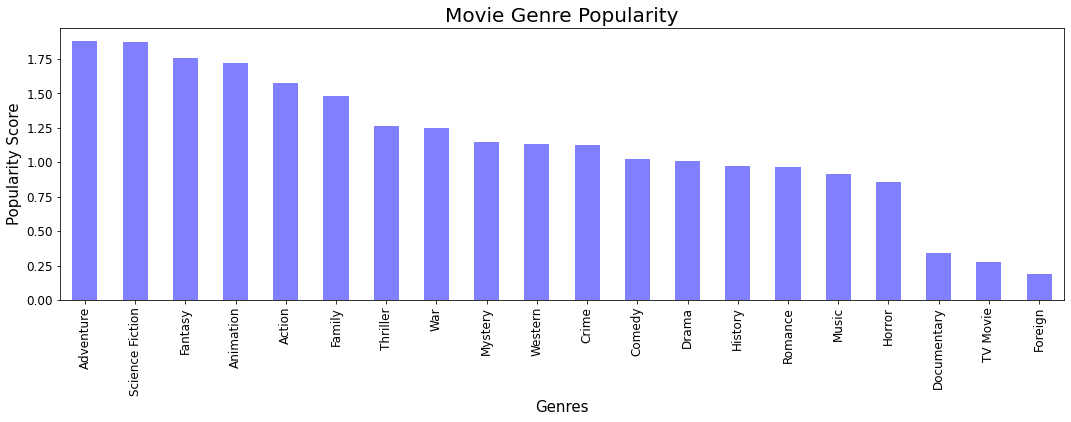

In [59]:
df_genres_popularity.plot(kind='bar', figsize=(18,5), color = '#8080ff')
plt.title("Movie Genre Popularity", size = 20)
plt.xlabel("Genres", size = 15)
plt.ylabel("Popularity Score", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12);

From the bar chart above, it seems that Adventure genre is the most popular. 

#### 1b. Popularity vs Vote Count
Now let's look at the vote count and see if it will produce the same results. We can do this by getting the total vote count for each genre.

In [60]:
df_genres_vote = df_genres.groupby('genres').vote_count.sum().sort_values(ascending=False)
df_genres_vote

genres
Action             872799
Drama              725898
Adventure          715916
Thriller           659135
Comedy             537233
Science Fiction    502785
Fantasy            355771
Crime              338718
Family             288657
Romance            229225
Animation          178613
Mystery            169556
Horror             147480
War                 67044
History             53487
Music               38102
Western             28512
Documentary          2281
Foreign               238
TV Movie               35
Name: vote_count, dtype: int64

We sort the results by descending order again and plot it into a bar chart.

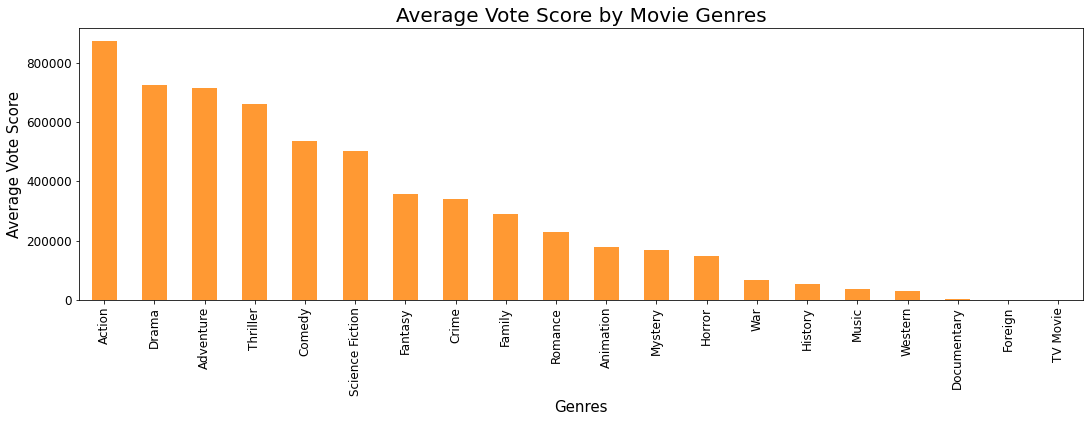

In [61]:
df_genres_vote.plot(kind='bar', figsize=(18,5), color = '#ff9933')
plt.title("Average Vote Score by Movie Genres", size = 20)
plt.xlabel("Genres", size = 15)
plt.ylabel("Average Vote Score", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12);

It looks like the most voted genre is Action and the most popular genre, Adventure, gets the third place. We can confirm this further by creating scatter plot.

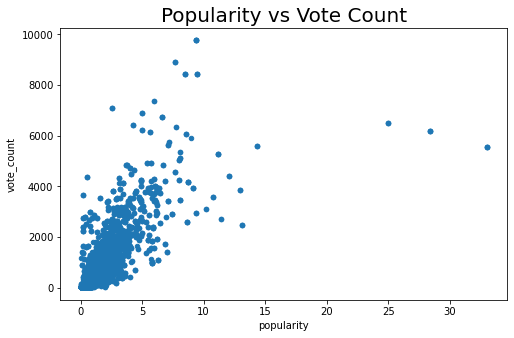

In [62]:
df_genres.plot.scatter(x='popularity', y='vote_count', figsize=(8,5))
plt.title("Popularity vs Vote Count", size = 20);

As seen below, there seems to be no relationship between popularity and the number of votes.

#### 1c. Popularity vs Revenue

Next, we will take a look if popular genres generally do better in generating revenues. We will get the average revenue for each genre and see which genre has the highest revenue.

In [63]:
df_genres_revenue = df_genres.groupby('genres').revenue.mean().sort_values(ascending=False)
df_genres_revenue

genres
Animation          2.594622e+08
Adventure          2.199730e+08
Fantasy            2.187749e+08
Family             2.067415e+08
Science Fiction    1.642510e+08
Action             1.576515e+08
War                1.060321e+08
Comedy             9.882625e+07
Thriller           9.831726e+07
Mystery            9.108964e+07
Western            8.741292e+07
Romance            8.673117e+07
Music              8.513230e+07
Crime              8.426126e+07
History            8.201769e+07
Drama              7.525066e+07
Horror             5.768960e+07
TV Movie           4.200000e+07
Documentary        2.649353e+07
Foreign            6.425841e+06
Name: revenue, dtype: float64

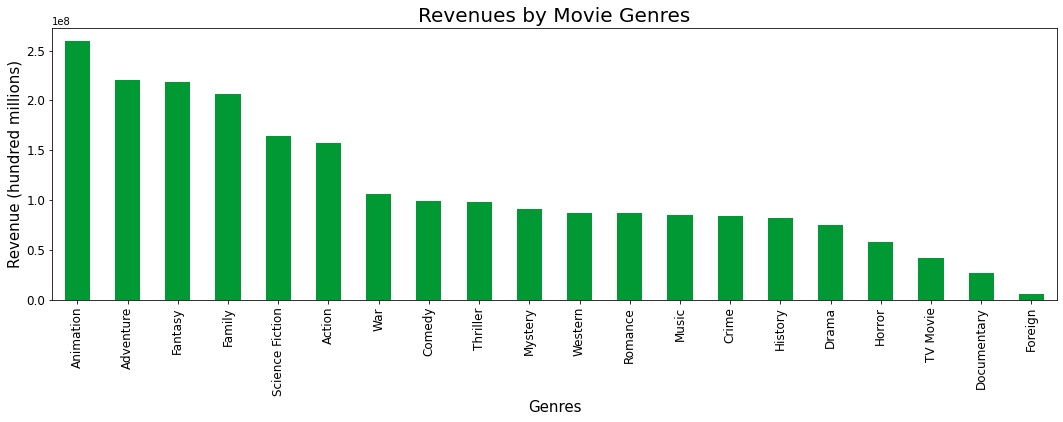

In [64]:
df_genres_revenue.plot(kind='bar', figsize=(18,5), color = '#009933')
plt.title("Revenues by Movie Genres", size = 20)
plt.xlabel("Genres", size = 15)
plt.ylabel("Revenue (hundred millions)", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12);

From the bar chart above, we can see that Animation earns the highest revenue in average, while the most popular genre, Adventure, is at the second place. We can look at scatter plot to see the correlation between the revenue and popularity.

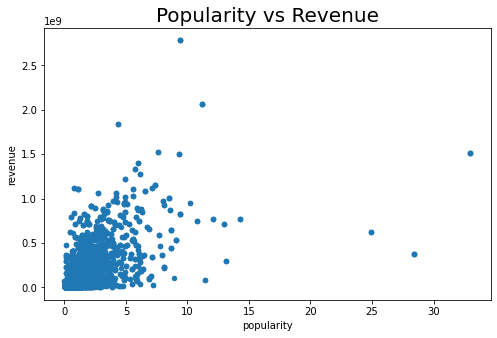

In [65]:
df_genres.plot.scatter(x='popularity', y='revenue', figsize=(8,5))
plt.title("Popularity vs Revenue", size = 20);

From the scatter plot, it does seem that there is no correlation between popularity and revenue.

#### 1d. Popularity vs Budget

Lastly, we will have a look if genre popularity affects the budget for making movies. Similarly, we will analyse this by getting the mean budget figure for each genre.

In [66]:
df_genres_budget = df_genres.groupby('genres').budget.mean().sort_values(ascending=False)
df_genres_budget

genres
Animation          7.751875e+07
Fantasy            7.086352e+07
Adventure          7.041056e+07
Family             6.341041e+07
Action             5.685005e+07
Science Fiction    5.615233e+07
Western            5.283489e+07
War                4.225584e+07
History            4.100008e+07
Thriller           3.752805e+07
Mystery            3.513943e+07
Comedy             3.355646e+07
Crime              3.312580e+07
Drama              2.837035e+07
Romance            2.756974e+07
Music              2.642924e+07
Horror             1.866482e+07
Foreign            1.060568e+07
Documentary        5.621577e+06
TV Movie           5.000000e+06
Name: budget, dtype: float64

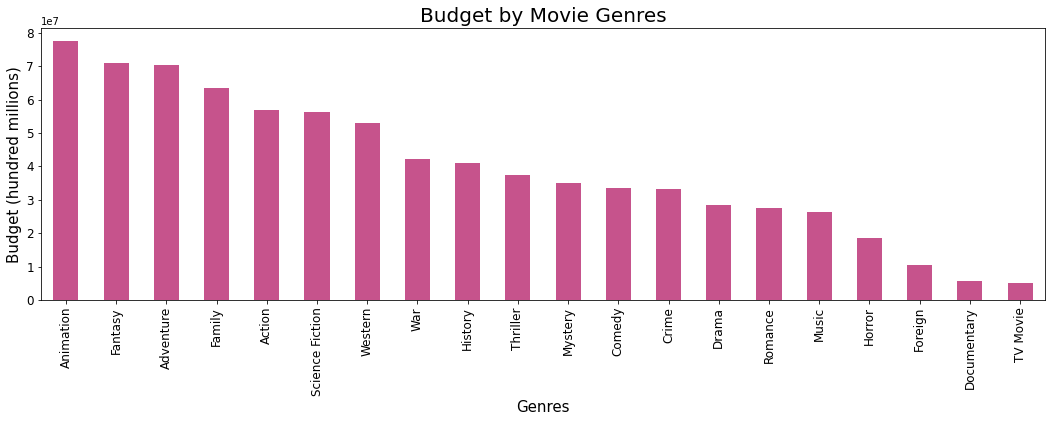

In [67]:
df_genres_budget.plot(kind='bar', figsize=(18,5), color = '#c6538c')
plt.title("Budget by Movie Genres", size = 20)
plt.xlabel("Genres", size = 15)
plt.ylabel("Budget (hundred millions)", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12);

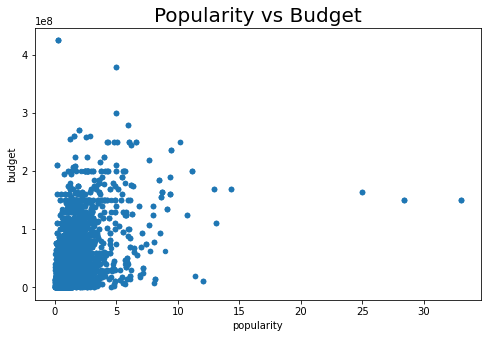

In [68]:
df_genres.plot.scatter(x='popularity', y='budget', figsize=(8,5))
plt.title("Popularity vs Budget", size = 20);

From the results above, we can see that Animation has the highest allocated budget on average and there is no correlation between popularity and movie budget.

### Research Question 2: How does budget relate to revenue?

From the previous analysis, we saw that Animation has the highest revenue and budget. Let's see the correlation between the two through scatter plot.

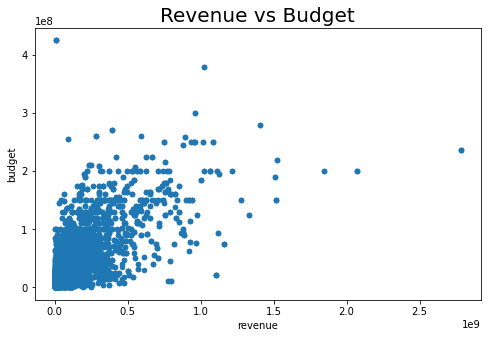

In [69]:
df_genres.plot.scatter(x='revenue', y='budget', figsize=(8,5))
plt.title("Revenue vs Budget", size = 20);

Again, there is no definitive trend between the two hence it seems that budget and revenue does not have correlation.

### Research Question 3: Does Production Companies producing more Animation has higher revenue?

Since Animation earns the highest revenue, we wonder if production companies making animation movies will tend to generate higher revenue. 

To analyse this, firstly we will have to split the Production Companies column like how we did with Genres column previously. We will copy the main dataset into a new placeholder, df_company, so that any modification that is made to Production Companies column will not affect the main dataset.

In [70]:
df_company = df.copy()

In [71]:
df_company.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,28.419936,6185,7.1,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,110000000,295238201,13.112507,2480,6.3,2015
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,11.173104,5292,7.5,2015
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,190000000,1506249360,9.335014,2947,7.3,2015


Similar to what we did earlier with Genres column, we will split the Production Companies by '|' separator into a list, and use explode function to separate them into different rows.

In [72]:
df_company['production_companies'] = df_company['production_companies'].str.split('|')

In [73]:
df_company.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",150000000,1513528810,32.985763,5562,6.5,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",150000000,378436354,28.419936,6185,7.1,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",110000000,295238201,13.112507,2480,6.3,2015
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",200000000,2068178225,11.173104,5292,7.5,2015
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",190000000,1506249360,9.335014,2947,7.3,2015


In [74]:
df_company = df_company.explode('production_companies')

In [75]:
df_company.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Dentsu,150000000,1513528810,32.985763,5562,6.5,2015


#### 3a. Production Company with The Highest Revenue

Now that we have split the Production Companies column, we would want to know which production company has the highest revenue.

In [76]:
company_total_rev = df_company.groupby('production_companies').revenue.sum().sort_values(ascending=False)
company_total_rev.head(1)

production_companies
Warner Bros.    52450110812
Name: revenue, dtype: int64

It looks like Warner Bros. has the highest revenue. Now let's see what kind of movies does Warner Bros. mostly make? Is it animation? 

To find out, we will have to create a new dataset containing movies that are produced by Warner Bros. only. We can do this by filtering the production companies and use a new placeholder for this dataset, df_wb.

In [77]:
df_wb = df_company.query('production_companies == "Warner Bros."')
df_wb.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
11,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Science Fiction|Fantasy|Action|Adventure,Warner Bros.,176000003,183987723,6.189369,1937,5.2,2015
22,San Andreas,Dwayne Johnson|Alexandra Daddario|Carla Gugino...,Brad Peyton,Action|Drama|Thriller,Warner Bros.,110000000,470490832,4.907832,2060,6.1,2015
43,The Man from U.N.C.L.E.,Henry Cavill|Armie Hammer|Alicia Vikander|Eliz...,Guy Ritchie,Comedy|Action|Adventure,Warner Bros.,75000000,108145109,3.053421,1548,7.0,2015
51,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,Comedy,Warner Bros.,35000000,194564672,2.814802,1255,7.1,2015
66,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,Warner Bros.,100000000,93820758,2.345821,805,6.4,2015


Since the Genres column in this dataset is still having multiple values in a row, we will have to split and use explode function again to sort this out.

In [78]:
df_wb['genres'] = df_wb['genres'].str.split('|')

<ipython-input-78-5a27e0b49745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wb['genres'] = df_wb['genres'].str.split('|')


In [79]:
df_wb.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
11,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,"[Science Fiction, Fantasy, Action, Adventure]",Warner Bros.,176000003,183987723,6.189369,1937,5.2,2015
22,San Andreas,Dwayne Johnson|Alexandra Daddario|Carla Gugino...,Brad Peyton,"[Action, Drama, Thriller]",Warner Bros.,110000000,470490832,4.907832,2060,6.1,2015
43,The Man from U.N.C.L.E.,Henry Cavill|Armie Hammer|Alicia Vikander|Eliz...,Guy Ritchie,"[Comedy, Action, Adventure]",Warner Bros.,75000000,108145109,3.053421,1548,7.0,2015
51,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,[Comedy],Warner Bros.,35000000,194564672,2.814802,1255,7.1,2015
66,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,"[Thriller, Drama, Adventure, Action, History]",Warner Bros.,100000000,93820758,2.345821,805,6.4,2015


In [80]:
df_wb = df_wb.explode('genres')
df_wb.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
11,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Science Fiction,Warner Bros.,176000003,183987723,6.189369,1937,5.2,2015
11,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Fantasy,Warner Bros.,176000003,183987723,6.189369,1937,5.2,2015
11,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Action,Warner Bros.,176000003,183987723,6.189369,1937,5.2,2015
11,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Adventure,Warner Bros.,176000003,183987723,6.189369,1937,5.2,2015
22,San Andreas,Dwayne Johnson|Alexandra Daddario|Carla Gugino...,Brad Peyton,Action,Warner Bros.,110000000,470490832,4.907832,2060,6.1,2015


Now that we have sorted out the data, we get the count of movie genres that Warner Bros. has been producing.

In [81]:
df_wb['genres'].value_counts()

Drama              164
Action             132
Thriller           128
Adventure           83
Comedy              82
Crime               78
Fantasy             51
Science Fiction     46
Romance             42
Mystery             37
Family              29
Horror              21
War                 12
History             12
Music               12
Animation            7
Western              6
Foreign              1
Name: genres, dtype: int64

Well, it seems that although Warner Bros. has the highest revenue, they mostly make Drama movies. It is a stark comparison with Animation which they only produced 7 movies.

#### 3b. Production Company Making Most Animation Movies

This brings out to the next question, if Warner Bros. do not make really make animation movies, then which production company actually makes mostly animation movies?

We will use df_genres dataset again to investigate this. We have sorted out the Genres column in the earlier steps so we can easily filter out the animation genres from this dataset.

In [82]:
df_genres.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Thriller,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,32.985763,5562,6.5,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,28.419936,6185,7.1,2015


In [83]:
df_anm = df_genres.query('genres == "Animation"')
df_anm.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Animation,Universal Pictures|Illumination Entertainment,74000000,1156730962,7.404165,2893,6.5,2015
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Animation,Walt Disney Pictures|Pixar Animation Studios|W...,175000000,853708609,6.326804,3935,8.0,2015
37,The Good Dinosaur,Raymond Ochoa|Jack Bright|Jeffrey Wright|Franc...,Peter Sohn,Animation,Walt Disney Pictures|Pixar Animation Studios|B...,175000000,331926147,3.339135,1087,6.6,2015
46,Home,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,Tim Johnson,Animation,Twentieth Century Fox Film Corporation|DreamWo...,135000000,368871007,2.976436,1060,6.9,2015
76,The Peanuts Movie,Noah Schnapp|Bill Melendez|Venus Schultheis|Ha...,Steve Martino,Animation,Blue Sky Studios|Twentieth Century Fox Animati...,99000000,246233113,2.140199,414,6.4,2015


After filtering out only animation movies, we will sort the Production Companies column again by split and explode function.

In [84]:
df_anm['production_companies'] = df_anm['production_companies'].str.split('|')

<ipython-input-84-f29690caa681>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anm['production_companies'] = df_anm['production_companies'].str.split('|')


In [85]:
df_anm.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Animation,"[Universal Pictures, Illumination Entertainment]",74000000,1156730962,7.404165,2893,6.5,2015
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Animation,"[Walt Disney Pictures, Pixar Animation Studios...",175000000,853708609,6.326804,3935,8.0,2015
37,The Good Dinosaur,Raymond Ochoa|Jack Bright|Jeffrey Wright|Franc...,Peter Sohn,Animation,"[Walt Disney Pictures, Pixar Animation Studios...",175000000,331926147,3.339135,1087,6.6,2015
46,Home,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,Tim Johnson,Animation,"[Twentieth Century Fox Film Corporation, Dream...",135000000,368871007,2.976436,1060,6.9,2015
76,The Peanuts Movie,Noah Schnapp|Bill Melendez|Venus Schultheis|Ha...,Steve Martino,Animation,"[Blue Sky Studios, Twentieth Century Fox Anima...",99000000,246233113,2.140199,414,6.4,2015


In [86]:
df_anm = df_anm.explode('production_companies')
df_anm.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Animation,Universal Pictures,74000000,1156730962,7.404165,2893,6.5,2015
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Animation,Illumination Entertainment,74000000,1156730962,7.404165,2893,6.5,2015
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Animation,Walt Disney Pictures,175000000,853708609,6.326804,3935,8.0,2015
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Animation,Pixar Animation Studios,175000000,853708609,6.326804,3935,8.0,2015
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Animation,Walt Disney Studios Motion Pictures,175000000,853708609,6.326804,3935,8.0,2015


After sorting out the data, we can now get the information on which company makes the most animation, by using value count function.

In [87]:
df_anm['production_companies'].value_counts()

Walt Disney Pictures                   54
DreamWorks Animation                   29
Pixar Animation Studios                16
Walt Disney Feature Animation          14
Twentieth Century Fox Animation        12
                                       ..
CityMation                              1
Arc Productions                         1
Tezuka Production Company Ltd.          1
Walt Disney Studios Motion Pictures     1
Walt Disney                             1
Name: production_companies, Length: 191, dtype: int64

It looks like Walt Disney Pictures is making animation the most. In fact, they make almost double amount of the company which is on the second place.

#### 3c. Production Companies Revenue Ranking

So we might be wondering, how does Walt Disney Pictures revenue compare with Warner Bros. then?

To get this information, let's go back to df_company dataset.

In [88]:
df_company.head()

,original_title,cast,director,genres,production_companies,budget,revenue,popularity,vote_count,vote_average,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,150000000,1513528810,32.985763,5562,6.5,2015
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Dentsu,150000000,1513528810,32.985763,5562,6.5,2015


We have sorted out the Production Companies column in this dataset. So we can easily get the revenue figures for each company by grouping them and get the total revenue for each company.

In [91]:
df_company.groupby('production_companies').revenue.sum().sort_values(ascending=False).head(20)

production_companies
Warner Bros.                              52450110812
Universal Pictures                        46230672846
Paramount Pictures                        39842685068
Twentieth Century Fox Film Corporation    36806982348
Walt Disney Pictures                      32027313979
Columbia Pictures                         28861963974
New Line Cinema                           20102238723
Amblin Entertainment                      15549310816
DreamWorks SKG                            14583989262
Relativity Media                          13403171274
Village Roadshow Pictures                 13253081265
Touchstone Pictures                       12369778253
Legendary Pictures                        12107614980
Columbia Pictures Corporation             12036882539
DreamWorks Animation                      11768549256
Dune Entertainment                        11379554692
Metro-Goldwyn-Mayer (MGM)                 10842126669
Pixar Animation Studios                    9698819254
Heyday 

From the data above, it looks like Walt Disney Pictures occupies the 5th place, which is not really far away from the top.

<a id='conclusions'></a>
## Conclusions

In summary, there seems to be no correlation between popularity and vote count, revenue, and budget. On another note, Animation seems to earn highest revenues but it does not necessarily mean that the production company that is making animation the most would have the highest revenue.

Nevertheless, we have to bear in mind of the limitation in this analysis. Originally there were 10866 records in the dataset. After data cleaning, there were only 3809 records remaining in the dataset, as certain columns with null values were dropped. Those columns are budget, revenue, and production companies, which are important part of our analysis. 